In [ ]:
%%bash
time mpirun -n 8 python strong.py

In [1]:
import sys
sys.path.append("/home/smets/codes/far/PHARE/pyphare")

In [2]:
from pyphare.pharesee.run import Run
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as gf
from numpy import polyfit
from scipy.signal import find_peaks
import glob
# %matplotlib widget

In [3]:
def get_velocities(run, times, sigma=6):
    """
    return an array for the x positions and
    a list of array x velocities for each time in times
    """
    for it, t in enumerate(times):
        V = run.GetVi(t, merged=True)
        Vx_interpolator = V["Vx"][0]
        x_ = V["Vx"][1][0]
        if sigma >0:
            v = gf(Vx_interpolator(x_), sigma)
        else:
            v = Vx_interpolator(x_)
        if it==0 :
            Vx_ = np.zeros((len(v), len(times)))
        Vx_[:, it] = v
    return x_, Vx_

In [4]:
def get_densities(run, times, sigma=6):
    """
    return an array for the x positions and
    a list of array x velocities for each time in times
    """
    for it, t in enumerate(times):
        N = run.GetNi(t, merged=True)
        Ni_interpolator = N["rho"][0]
        x_ = N["rho"][1][0]
        if sigma >0:
            n = gf(Ni_interpolator(x_), sigma)
        else:
            n = Ni_interpolator(x_)
        if it==0 :
            Ni_ = np.zeros((len(n), len(times)))
        Ni_[:, it] = n
    return x_, Ni_

In [5]:
def get_electric(run, times, sigma=6):
    """
    return an array for the x positions and
    a list of array x velocities for each time in times    
    """
    for it, t in enumerate(times):
        E = run.GetE(t, merged=True)
        Ex_interpolator = E["Ex"][0]
        x_ = E["Ex"][1][0]
        if sigma >0:
            e = gf(Ex_interpolator(x_), sigma)
        else:
            e = Ex_interpolator(x_)
        if it==0 :
            Ex_ = np.zeros((len(e), len(times)))
        Ex_[:, it] = e
    return x_, Ex_

In [6]:
def profiles(times, x, Ys, vmin=None,vmax=None, marker=None, **kw):
    fig, ax = plt.subplots()
    for it,t in enumerate(times):
        ax.plot(x, Ys[:,it], label=r"t={:5.2f}".format(t), marker=marker)
        ax.set_ylim((-2.5, 2.5))
        ax.axhline(0, ls='--', color='k')
        if vmin is not None and vmax is not None:
            ax.set_ylim((vmin,vmax))
    ax.legend(ncol=4)

# Strong perturbation

We do now address the case of a velocity perturbation of the order, or larger, with respect to the sound speed $c=\sqrt{\gamma T}$. The simulations are one dimensional, along the $x$ axis

In [7]:
root_path = "/home/smets/codes/far/farMe/fluKin/strong/"

In [8]:
paths = glob.glob(root_path+"/sp*")
print(paths)

['/home/smets/codes/far/farMe/fluKin/strong/sp1']


## With electron temperature Te=0.05

DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_man

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSerifCondensed-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre/texgyrebonum-italic.otf', name='TeX Gyre Bonum', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/kurier/KurierCond-BoldItalic.otf', name='Kurier Cond', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmit12.otf', name='drmit12', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmscbx24.otf',

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/librefranklin/LibreFranklin-ExtraLightItalic.otf', name='Libre Franklin', style='italic', variant='normal', weight=275, stretch='normal', size='scalable')) = 11.16875
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/berenisadf/BerenisADFProSC-BoldItalic.otf', name='Berenis ADF Pro SC', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-droid-sans-fonts/DroidSansHebrew-Regular.ttf', name='Droid Sans Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fetamont/ffmb10.otf', name='Fetamont', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontE

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/overlock/Overlock-BlackItalic-OTF.otf', name='Overlock', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/playfair/PlayfairDisplay-Black.otf', name='Playfair Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmittc8.otf', name='drmittc8', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/NimbusMonoPS-Italic.otf', name='Nimbus Mono PS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/rosario/Rosario-SemiBol

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/clara/clarai.otf', name='Clara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/newtx/ntxsups-Bold.otf', name='ntxsups', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTCaslan-BoldItalic.otf', name='QTCaslan', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Variants-Bold.otf', nam

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-CondensedExtraBold.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmmono12-regular.otf', name='Latin Modern Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-CondensedExtraLight.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=200, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozb8.otf', name='drmdozb8', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntr

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmmonoproplt10-regular.otf', name='Latin Modern Mono Prop Light', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/gnu-freefont/FreeSans.otf', name='FreeSans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozscbx14.otf', name='drmdozscbx14', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/overlock/Overlock-Italic-OTF.otf', name='Overlock', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fetamont/ffmho8.otf', name='Fe

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/almfixed/almfixed.otf', name='ALM Fixed', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/universalis/UniversalisADFStd-BoldCondIt.otf', name='Universalis ADF Std', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmb6.otf', name='drmb6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drm7.otf', name='drm7', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cochineal/Cochineal-Roman.otf', name='Cochineal', style='norm

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/haranoaji/HaranoAjiMincho-Regular.otf', name='Harano Aji Mincho', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTImpromptu.otf', name='QTImpromptu', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/chivo/Chivo-MediumItalic.otf', name='Chivo', style='italic', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drminf17.otf', name='drminf17', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/skaknew/AlphaDia.otf', name='Chess Alpha Di

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Marks-Italic.otf', name='STIX MathJax Marks', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmfigs6.otf', name='drmfigs6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmroman17-regular.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cabin/Cabin-SemiBoldItalic.otf', name='Cabin', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/URWBookman-Demi.otf', name

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmsans12-oblique.otf', name='Latin Modern Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmmi10.otf', name='drmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/NimbusSans-Bold.otf', name='Nimbus Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozit6.otf', name='drmdozit6',

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre/texgyrecursor-bolditalic.otf', name='TeX Gyre Cursor', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/step/STEP-BoldItalic.otf', name='STEP', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/svrsymbols/SVRsymbols.otf', name='SVRsymbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozit8.otf', name='drmdozit8', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTHelvet-Black.otf', name='QTHelvet-Bla

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-SemiCondensedLight.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/haranoaji-extra/HaranoAjiMincho-ExtraLight.otf', name='Harano Aji Mincho', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/poltawski/antpolt-regular.otf', name='Antykwa Poltawskiego', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/comicneue/ComicNeue-Regular.otf', name='Comic Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:find

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/MathJax_Math-BoldItalic.otf', name='MathJax_Math', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/antt/AntykwaTorunskaCondMed-Regular.otf', name='Antykwa Torunska Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozittc14.otf', name='drmdozittc14', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Normal-Italic.otf', name='STIX MathJax Normal', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozit11.otf', name='drmdozit11', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/gnu-free/FreeSans.ttf', name='FreeSans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTKooper-Italic.otf', name='QTKooper', style='italic', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmsl10.otf', name='drmsl10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/libertinus-fonts/LibertinusSerifDisplay-Regular.otf', name='Libertinus Seri

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Latin-Regular.otf', name='STIX MathJax Latin', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/iwona/IwonaHeavy-Regular.otf', name='Iwona Heavy', style='normal', variant='normal', weight=850, stretch='normal', size='scalable')) = 10.4775
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/baskervillef/BaskervilleF-Bold.otf', name='BaskervilleF', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTKorrin.otf', name='QTKorrin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fourier/FourierOrn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/algolrevived/AlgolRevived-MediumSlanted.otf', name='AlgolRevived', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozsl24.otf', name='drmdozsl24', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/paratype-pt-sans/PTN57F.ttf', name='PT Sans Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTVagaRound-Bold.otf', name='QTVagaRound', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmmonoltcond10-regu

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmittc17.otf', name='drmittc17', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/stix-fonts/STIX2Text-Italic.otf', name='STIX Two Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drm12.otf', name='drm12', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-SemiCondensedSemiBold.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTEraType.otf', name=

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drm11.otf', name='drm11', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmuibx6.otf', name='drmuibx6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/newpx/TeXGyrePagellaX-Italic.otf', name='TeX Gyre PagellaX', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-CondensedSemiBold.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmtc7.otf', name='drmtc7', 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/domitian/Domitian-Bold.otf', name='Domitian', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/inriafonts/InriaSerif-BoldItalic.otf', name='Inria Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozsl9.otf', name='drmdozsl9', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mdsymbol/MdSymbol-Semibold.otf', name='MdSymbol', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Alphabets-BoldItalic.otf'

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/smc-rachana/Rachana-Bold.ttf', name='Rachana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/nimbus15/zhv-Reg.otf', name='Nimbus Sans L', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozit12.otf', name='drmdozit12', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Variants-Regular.otf', name='STIX MathJax Va

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/poltawski/antpoltcond-italic.otf', name='Antykwa Poltawskiego', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/librefranklin/LibreFranklin-Thin.otf', name='Libre Franklin', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/liberation-sans/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dantelogo/DANTE-Italic.otf', name='DANTE', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fetamont/ffmhwo10.otf', name='Fetamont Script', style='oblique', variant='normal', weight=800, stretch='normal', size='scalable')) = 11.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Main-Italic.otf', name='STIX MathJax Main', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/jsmath-fonts/jsMath-cmex10.ttf', name='jsMath-cmex10', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre/texgyrepagella-regular.otf', name='TeX Gyre Pagella', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drms

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozsc17.otf', name='drmdozsc17', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmui11.otf', name='drmui11', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdoztc24.otf', name='drmdoztc24', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTSchoolCentury.otf', name='QTSchoolCentury', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/firamath/FiraMath-Regular.otf', name='Fira Math', style='normal', var

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozitsc9.otf', name='drmdozitsc9', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lilyglyphs/emmentaler-23.otf', name='Emmentaler-23', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/adobe-source-code-pro/SourceCodePro-BoldIt.otf', name='Source Code Pro', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mnsymbol/MnSymbol6.otf', name='MnSymbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drml8.otf', name='drml8'

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/MathJax_Caligraphic-Bold.otf', name='MathJax_Caligraphic', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/poltawski/antpoltltsemicond-bolditalic.otf', name='Antykwa Poltawskiego Light', style='italic', variant='normal', weight=600, stretch='condensed', size='scalable')) = 11.44
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto-cjk/NotoSerifCJK-SemiBold.ttc', name='Noto Serif CJK JP', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fetamont/ffmho10.otf', name='Fetamont', style='oblique', variant='normal', weight=800, stretch='normal', size='scalable')) = 11.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTCloisteredMonk.otf', name='QTCloisteredMonk', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmscbx8.otf', name='drmscbx8', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto-cjk/NotoSansCJK-DemiLight.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/domitian/Domitian-Roman.otf', name='Domitian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/rosario/Rosario-Regular.otf

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/kurier/KurierCondHeavy-Regular.otf', name='Kurier Cond Heavy', style='normal', variant='normal', weight=850, stretch='condensed', size='scalable')) = 10.677499999999998
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/umtypewriter/UMTypewriter-BoldItalic.otf', name='UM Typewriter', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre/texgyreheros-italic.otf', name='TeX Gyre Heros', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmroman6-regular.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/oldstandard/OldStandard-Italic.otf', name='Old Standard', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmui6.otf', name='drmui6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/txfontsb/FreeSerifb-SmallCaps.otf', name='FreeSerifb', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmscbx6.otf', name='drmscbx6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/MathJax_Fraktur-Regular.otf', name='MathJax_Fraktur

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-SemiCondensedBold.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre/texgyretermes-regular.otf', name='TeX Gyre Termes', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdoz24.otf', name='drmdoz24', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozbx7.otf', name='drmdozbx7', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/baskervillef/Baskervill

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cm-unicode/cmunso.otf', name='CMU Sans Serif', style='oblique', variant='normal', weight=700, stretch='expanded', size='scalable')) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cm-unicode/cmunbbx.otf', name='CMU Bright', style='normal', variant='normal', weight=700, stretch='expanded', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mnsymbol/MnSymbol-Bold6.otf', name='MnSymbol', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuMathTeXGyre.ttf', name='DejaVu Math TeX Gyre', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/MathJax_Script-Regular.otf

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozitsc12.otf', name='drmdozitsc12', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/poltawski/antpoltltexpd-bold.otf', name='Antykwa Poltawskiego Light', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/paktype-naskh-basic/PakTypeNaskhBasic.ttf', name='PakType Naskh Basic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTBookmann-BoldItalic.otf', name='QTBookmann', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cabin/Cabin-Bold.otf', name='Cabin', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cm-unicode/cmunsi.otf', name='CMU Sans Serif', style='oblique', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/kurier/KurierHeavy-Regular.otf', name='Kurier Heavy', style='normal', variant='normal', weight=850, stretch='normal', size='scalable')) = 10.4775
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozl24.otf', name='drmdozl24', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fetamont/ffmho9.otf', name='Fetamont', style='oblique', var

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-noto/NotoSansSinhala-Black.ttf', name='Noto Sans Sinhala', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmtc12.otf', name='drmtc12', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/paratype-pt-sans/PTS56F.ttf', name='PT Sans', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/xcharter/XCharter-Roman.otf', name='XCharter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/semaphor/smfbsl10.otf', name='Semafor', style=

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSans-ExtraLight.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 0.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/antt/AntykwaTorunska-Bold.otf', name='Antykwa Torunska', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/rosario/Rosario-LightItalic.otf', name='Rosario', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/linguisticspro/Lingu

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cm-unicode/cmunbso.otf', name='CMU Bright', style='oblique', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/comicneue/ComicNeue-BoldItalic.otf', name='Comic Neue', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/iwona/IwonaCondMedium-Italic.otf', name='Iwona Cond Medium', style='italic', variant='normal', weight=500, stretch='condensed', size='scalable')) = 11.344999999999999
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/D050000L.otf', name='D050000L', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cm-unicode/cmunobi

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre-math/texgyrepagella-math.otf', name='TeX Gyre Pagella Math', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mdsymbol/MdSymbol-Light.otf', name='MdSymbol', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmtcbx7.otf', name='drmtcbx7', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/xits/XITS-Regular.otf', name='XITS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/poltawski/antpolt-italic.otf', name='Antykwa Polta

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/gnu-freefont/FreeMono.otf', name='FreeMono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/libertinus-fonts/LibertinusKeyboard-Regular.otf', name='Libertinus Keyboard', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmitbx6.otf', name='drmitbx6', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Normal-Bold.otf', name='STIX MathJax Normal', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/comicneue/Com

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozitsc24.otf', name='drmdozitsc24', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmdozit10.otf', name='drmdozit10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmitsc10.otf', name='drmitsc10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/qualitype/QTTimeOutline.otf', name='QTTimeOutline', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/drm/drmtc11.otf', name='drmtc11', style='normal', variant='normal

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/etbb/ETbb-Bold.otf', name='ETbb', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/clara/clarab.otf', name='Clara', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tex-gyre/texgyreadventor-bolditalic.otf', name='TeX Gyre Adventor', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/smc-meera/Meera-Regular.ttf', name='Meera', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmsans12-regular.otf', name='Latin Modern Sans', style=

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/gnu-freefont/FreeSansBold.otf', name='FreeSans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/thai-scalable/Waree-Oblique.ttf', name='Waree', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm/lmmonoltcond10-oblique.otf', name='Latin Modern Mono Light Cond', style='oblique', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/imfellenglish/IMFeENit28P.otf', name='IM FELL English', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/cm-unicode/cm

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/punknova/punknova-bold.otf', name='Punk Nova', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/librefranklin/LibreFranklin-MediumItalic.otf', name='Libre Franklin', style='italic', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lm-math/latinmodern-math.otf', name='Latin Modern Math', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/mathjax/STIXMathJax_Main-Bold.otf', name='STIX MathJax Main', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/u

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


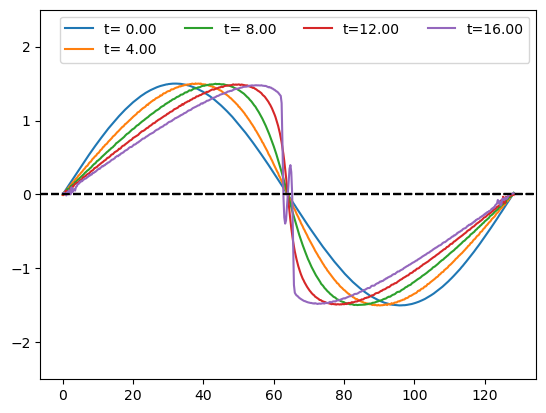

In [9]:
irun = 0

r = Run(paths[irun])
times   = np.asarray((0, 4, 8, 12, 16))
x, Vs   = get_velocities(r, times, sigma=0)
profiles(times, x, Vs)

In [ ]:
irun=0

r = Run(paths[irun])
times   = np.asarray((0, 4, 8, 12, 16))
x, Ns   = get_densities(r, times, sigma=0)
profiles(times, x, Ns, -0.2, 8)

In [ ]:
irun=0

r = Run(paths[irun])
times   = np.asarray((0, 4, 8, 12, 16))
x, E   = get_electric(r,times, sigma=0)
profiles(times, x, E, -0.1, 0.1)

In [ ]:
time = 10
ions = r.GetParticles(time, ["protons",])

In [ ]:
p, f = ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
                      # ax=ax1,            # default creates the figure
                      norm = 0.4,     # max value, min is 0
                      finest=True,  # only consider finest particles possible
                      # levels=(0,)    # default is (0,), tuple of all levels to overplot
                      #bulk=True,        # draw line(s) at mean vel. on vel. axis
                      #xlim=(0,20),     # default takes full data range
                      #ylim=(-2,2),     # default takes full data range
                      #sigma = (1,1),   # gaussian filter 2D
                      #filename=myImage.png, # will save result in file
                      gaussian_filter_sigma=0,
                      vmin=-4,vmax=4,
                      dv=0.05,
                      title="Strong perturbation  t = {:.4f}".format(time), # figure title
                      #xlabel="my x label", # default is name of chosen axis[0]
                      #ylabel= "my y label", # default is name of chosen axis[1]
                      # kde = True,     # default False, draws kernel density estimate contours
                      # interp = True,
                      cmap = "viridis_r",
                     )

In [ ]:
time = 10
print("bite a")
ions = r.GetParticles(t, ["protons",])
print("bite b")
fig, ax1 = plt.subplots(figsize=(8,6))
print("bite c")
p, f = ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
                      ax=ax1,            # default creates the figure
                      norm = 0.4,     # max value, min is 0
                      finest=True,  # only consider finest particles possible
                      # levels=(0,)    # default is (0,), tuple of all levels to overplot
                      #bulk=True,        # draw line(s) at mean vel. on vel. axis
                      #xlim=(0,20),     # default takes full data range
                      #ylim=(-2,2),     # default takes full data range
                      #sigma = (1,1),   # gaussian filter 2D
                      #filename=myImage.png, # will save result in file
                      gaussian_filter_sigma=0,
                      vmin=-4,vmax=4,
                      dv=0.05,
                      title="Strong perturbation  t = {:.4f}".format(t), # figure title
                      #xlabel="my x label", # default is name of chosen axis[0]
                      #ylabel= "my y label", # default is name of chosen axis[1]
                      # kde = True,     # default False, draws kernel density estimate contours
                      # interp = True,
                     )

In [ ]:
print(f)
print(type(f))
print(len(f))

In [ ]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

In [ ]:
t=2
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p, f = ions.dist_plot(axis = ("x", "Vx"),  # default [Vx,Vy]
                      ax = ax1,  # default creates the figure
                      norm = 0.4,  # max value, min is 0
                      finest = True,  # only consider finest particles possible
                      # levels=(0,),  # default is (0,), tuple of all levels to overplot
                      # bulk=True,  # draw line(s) at mean vel. on vel. axis
                      # xlim=(0,20),  # default takes full data range
                      # ylim=(-2,2),  # default takes full data range
                      # sigma = (1,1),  # gaussian filter 2D
                      # filename=myImage.png, # will save result in file
                      gaussian_filter_sigma = 1,
                      vmin = -4,vmax = 4,
                      dv = 0.05,
                      title = "Strong perturbation  t = {:.4f}".format(t), # figure title
                      # xlabel="my x label", # default is name of chosen axis[0]
                      # ylabel= "my y label", # default is name of chosen axis[1]
                      # kde = True,  # default False, draws kernel density estimate contours               
                     )

In [ ]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

In [ ]:
t=5
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [ ]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

## Without electron temperature Te=0

In [ ]:
irun = 1
r = Run(paths[irun])
times   = np.asarray((0,1,2,3,4,6,8))
x, Vs   = get_velocities(r,times, sigma=0)
profiles(times, x, Vs)

In [ ]:
irun=1
r = Run(paths[irun])
times   = np.asarray((0,2,4,6,8))
x, Ns   = get_densities(r,times, sigma=0)
profiles(times, x, Ns, -0.2, 7)

In [ ]:
irun=1
r = Run(paths[irun])
times   = np.asarray((0,2,4,6,8))
x, E   = get_electric(r,times, sigma=0)
profiles(times, x, E, -0.5, 0.5)

In [ ]:
t=1
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [ ]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

In [ ]:
t=2
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [ ]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

In [ ]:
t=5
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [ ]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

## profiles as a function of Te

In [ ]:
paths

In [ ]:
r = Run(paths[0])
times   = np.asarray((0,2,4,6,8))
x, Ns   = get_densities(r,times, sigma=0)
profiles(times, x, Ns, -0.2, 7)